## Motivation

We're trying to define **lines** that maximize the separation (or **discriminates**) between multiple classes. Full stop.

Borrowing from ISL, the following images show:

- The true data distributions on the left
- The theoretical best line of separation (Bayes' decision boundary), as dashed lines
- Some example data, sampled on the true dists, on the right images
- Our calculation of these "lines that maximize separation", as solid lines

For the case where we have 2 classes and 1 feature in `X`

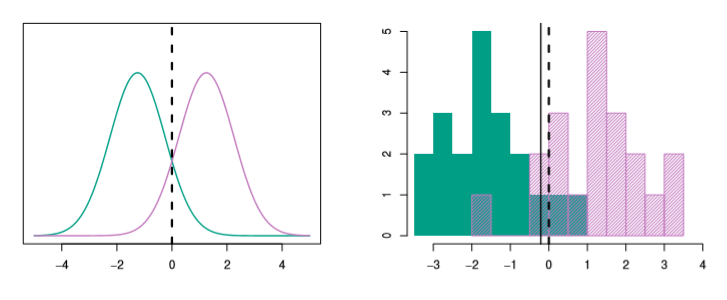

In [1]:
from IPython.display import Image

Image('images/fig_4_4.PNG')

And 3 classes with two features in `X`

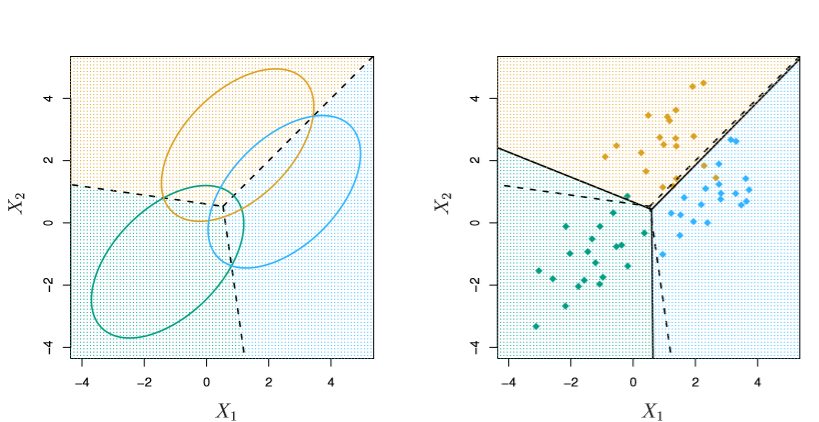

In [2]:
Image('images/fig_4_6.PNG')

### Derivation

As a jumping-off point, consider how we'd describe the Multiclass Logistic Regression problem to someone emphatically Bayesian.

We might say that given `k` classes, we're modeling

$P(Y=k|X=x)$

Expanding on this, they'd likely advocate for training a distinct model for each response class `k` in our population `Y`.

And so we define a *density function* `f_k(X)` as:

$f_k(X) = \hat{P}(X=x|Y=k) $

Then do some Bayes' Theorem Magic™ to work backwards into our first equation.

**Note:** From here, the notation gets pretty hairy. So in lieu of doing LaTeX gymnastics, I'll leverage screen grabs from [these Stanford slides](https://web.stanford.edu/class/stats202/content/lec9.pdf)

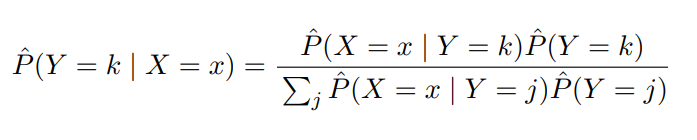

In [3]:
Image('images/bayes_lda.PNG')

- The `P_hat(X|Y)` terms are the same as above, but unique to each class `j`.
- The `P_hat(Y)` terms, or the posteriors, are a simple sampling of your data to get an idea of the distribution of your `k` classes

## Composing Intuition

First, we need to keep in mind (and will later relax) two critical assumptions:

1. `f_k(X)` is normally distributed
2. The variances for each of the `k` classes are the same, thus

$\sigma_1^2 = \dots = \sigma_k^2 \rightarrow \sigma^2$

We'll start small.

### One Feature

Here, we'll assume that our `X` contains multiple records with dimension `p=1`, trying to predict `K` classes.

Substituting the normal distribution into the formula above, we get `p_k(x)`, or "the probability that the observation is in class `k`, given `x`"

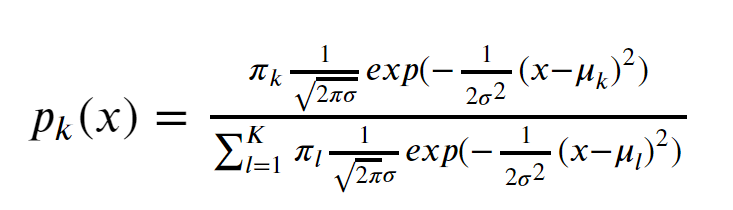

In [4]:
Image('images/p_k_equation.PNG')

Mouthful. And a pain in the ass to type in LaTeX.

But if we wanted to, we could use this to plug-and-chug our predictions of `k`, given any `x`. We'd just need to calculate and plug in three naive values:

- The average weighted mean of `x` for observations of class `k`

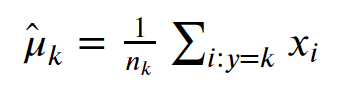

In [5]:
Image('images/weighted_mean.PNG')

- The average of the sample variances, weighted for each class

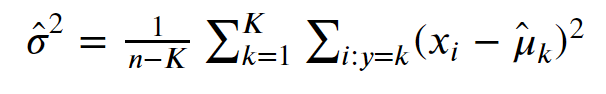

In [6]:
Image('images/weighted_var.PNG')

- A simple posterior distribution of how many samples will be of class `k`

$\hat{\pi}_k = \frac{n_k}{n}$

We'd pipe our values into this equation for each class `k` and take the value with the highest probability.

Or equivalently, if we take the log of this fraction. As

- The max still gives us the class w/ the highest prob (log is concave)
- The whole bottom part "drops out" (as none of the terms change with `k`)

This gives us our *discriminant function* which determines the decision boundary between picking one class over the other.

$\delta_k(x) = x * \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + log(\pi_k)$

Given that the title of this notebook contains the words "**Linear** Discriminant", it should be no surprise that this decision boundary is expressed as a **linear** combination of `x` and some constants.

### Many Features

This problem really doesn't change *that* much when you expand the dimensionality of our feature space. The only difference is that our `f_k(x)` is represented as a Multivariate Normal and that each class shares a Covariance matrix, `EPSILON`, instead of a standard deviation. Thus

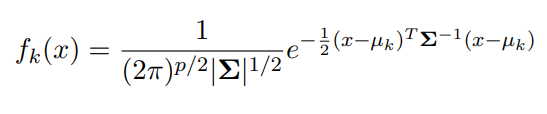

In [7]:
Image('images/f_k_multi.PNG')

And if we perform the same "take the log, and toss everything that doesn't change with `k`" schtick that we did above, we get a descriminant function that looks like

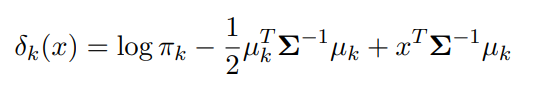

In [8]:
Image('images/multi_log.PNG')

And if we want to know the decision boundary between the prediction of two classes, we just set the two equations equal to one another and get a boundary that's, you guessed it, **linear** in `x`.

Borrowing wholesale from the Stanford slides:

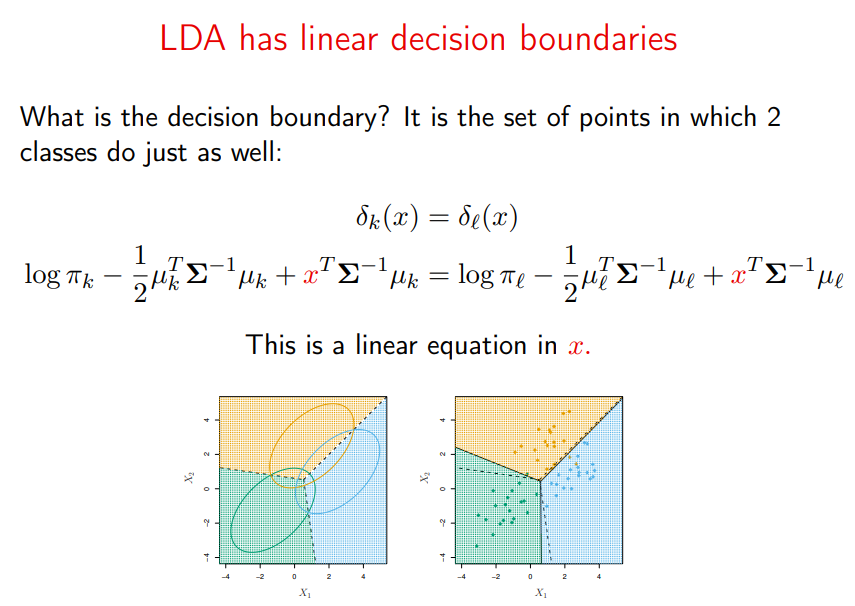

In [9]:
Image('images/multi_decision_boundary.PNG')

## Extending to the Quadratic

Finally, we can relax one more assumption.

When we no longer assume that each class shares the same Covariance matrix, our "log and reduce" trick now bears some unwieldy terms at the end with covariances specific to each class. Critically, these involve each involve multiplying the `x` terms by themselves thus giving us a decision boundary that's expressed **quadratically**.

Below, the green line is QDA, our estimate, and the purple dashed line is the optimal Bayes boundary.

In the first image, both classes have the same covariance and QDA underperforms relative to LDA (black dots). But in the second, the covariances differ and QDA shines, very-nearly fitting the form of the Bayes classifier.

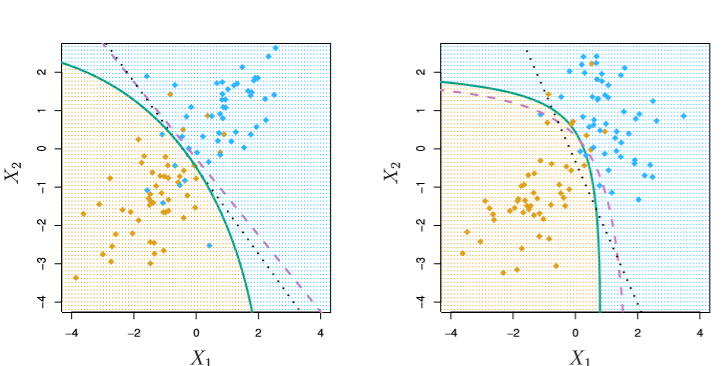

In [10]:
Image('images/fig_4_9.PNG')

**Note**: While QDA is clearly favorable from an accuracy standpoint (in distributions that call for it-- more on this below), it can be considerably more expensive computationally.

The covariance matrix involves finding `p (1-p) / 2` values for each pairwise features. Because we now assume that each class has its own covariance matrix, we just multiplied this expensive calculation by a factor of `k`.

## Comparison

The whole reason for putting these notebooks together is to provide an intuitive understanding of these approaches and how they work. There's no silver-bullet algorithm that's most appropriate for every scenario, and the following scenarios demonstrate just that.

(Scenarios from ISL images from [these slides](https://web.stanford.edu/class/stats202/content/lec11.pdf)) 

When the data meets all of our LDA assumptions, it's extremely powerful

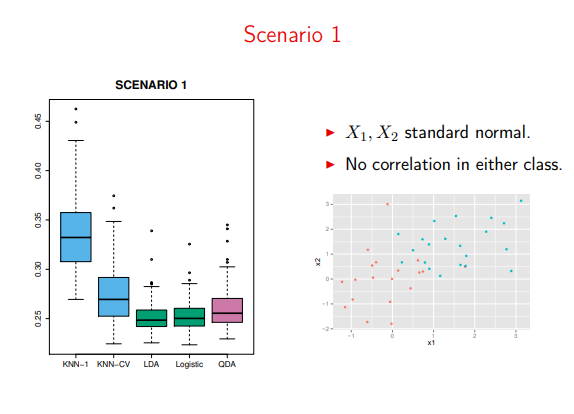

In [11]:
Image('images/sc1.PNG')

Moreover, QDA just needlessly over-complicates things

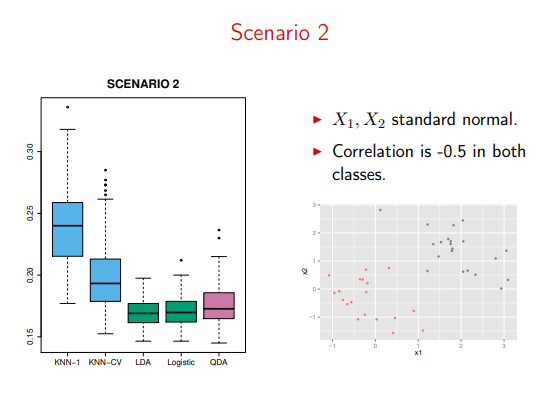

In [12]:
Image('images/sc2.PNG')

Especially on violations of the "Normal/Multivariate Normal" distributions

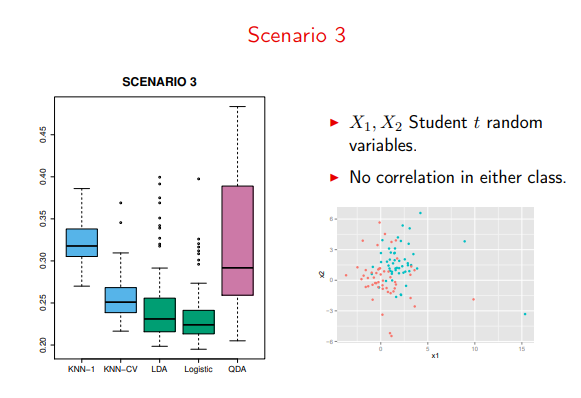

In [13]:
Image('images/sc3.PNG')

On the other hand, it takes over as the dominant algorithm on violations of class-constant covariance

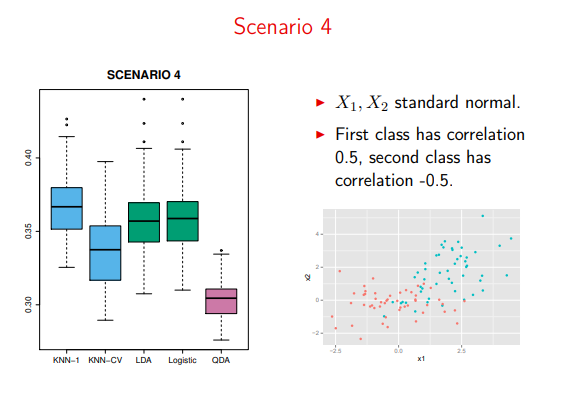

In [14]:
Image('images/sc4.PNG')

And LDA falls apart when trying to model actual quadratic data

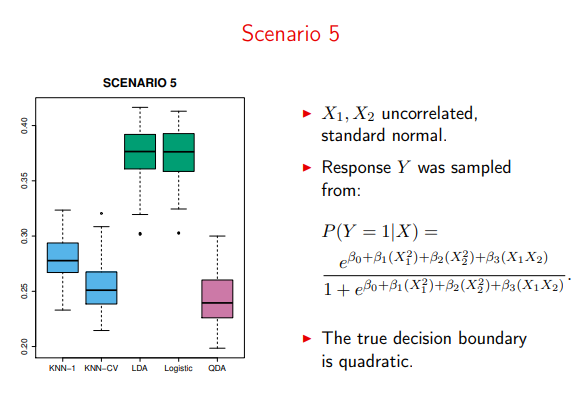

In [15]:
Image('images/sc5.PNG')

But past distributions that can be modeled with a neat quadratic, QDA also takes back seat to less-parametric algorithms (here, cross-validated KNN)

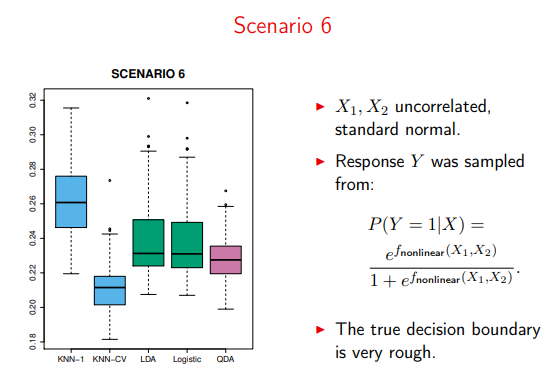

In [16]:
Image('images/sc6.PNG')